In [30]:
from matplotlib import image as img
image = img.imread('./test2.jpg')
image.shape 

(797, 1280, 3)

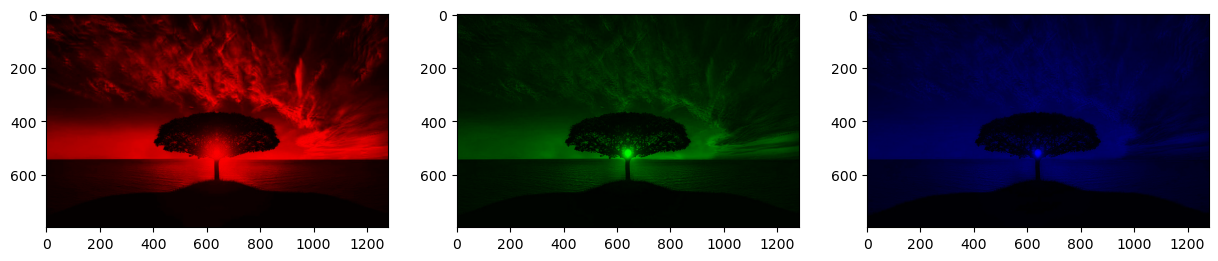

In [28]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))
for c, ax in zip(range(3), ax):
    channel = np.zeros(image.shape, dtype="uint8")
    channel[:, :, c] = image[:, :, c]
    ax.imshow(channel)

converting our MxNx3 array into 3 1d lists


In [15]:
from scipy.cluster.vq import whiten
import pandas as pd

df = pd.DataFrame()
df['r']=pd.Series(image[:,:,0].flatten())
df['g']=pd.Series(image[:,:,1].flatten())
df['b']=pd.Series(image[:,:,2].flatten())
df.head()

,r,g,b
0,11,11,23
1,12,12,24
2,14,14,26
3,15,15,27
4,16,14,27


whitening the data for standardization

In [16]:
df['r_whiten'] = whiten(df['r'])
df['g_whiten'] = whiten(df['g'])
df['b_whiten'] = whiten(df['b'])
df.head()

,r,g,b,r_whiten,g_whiten,b_whiten
0,11,11,23,0.170453,0.434467,0.774984
1,12,12,24,0.185949,0.473964,0.808679
2,14,14,26,0.216940,0.552958,0.876069
3,15,15,27,0.232436,0.592455,0.909764
4,16,14,27,0.247932,0.552958,0.909764


In [19]:
from scipy.cluster.vq import kmeans
cluster_centers, distortion = kmeans(df[['r_whiten', 'g_whiten', 'b_whiten']], 5)
cluster_centers

array([[0.478514  , 0.70013222, 1.3906607 ],
       [1.02109608, 1.11260409, 2.00130102],
       [0.17675422, 0.18012188, 0.19823056],
       [3.09447063, 3.30717283, 3.18911682],
       [2.00528076, 1.75034896, 2.51410921]])

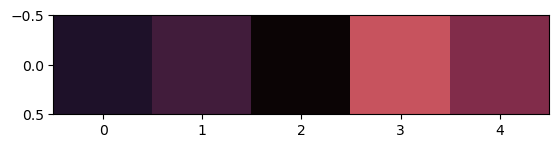

[(30, 17, 41), (65, 28, 59), (11, 4, 5), (199, 83, 94), (129, 44, 74)]

In [20]:
r_std, g_std, b_std = df[['r', 'g', 'b']].std()
colors=[]
for color in cluster_centers:
    sr, sg, sb = color
    colors.append((int(sr*r_std), int(sg*g_std), int(sb*b_std)))
plt.imshow([colors])
plt.show()
colors

the image on which analysis done was this
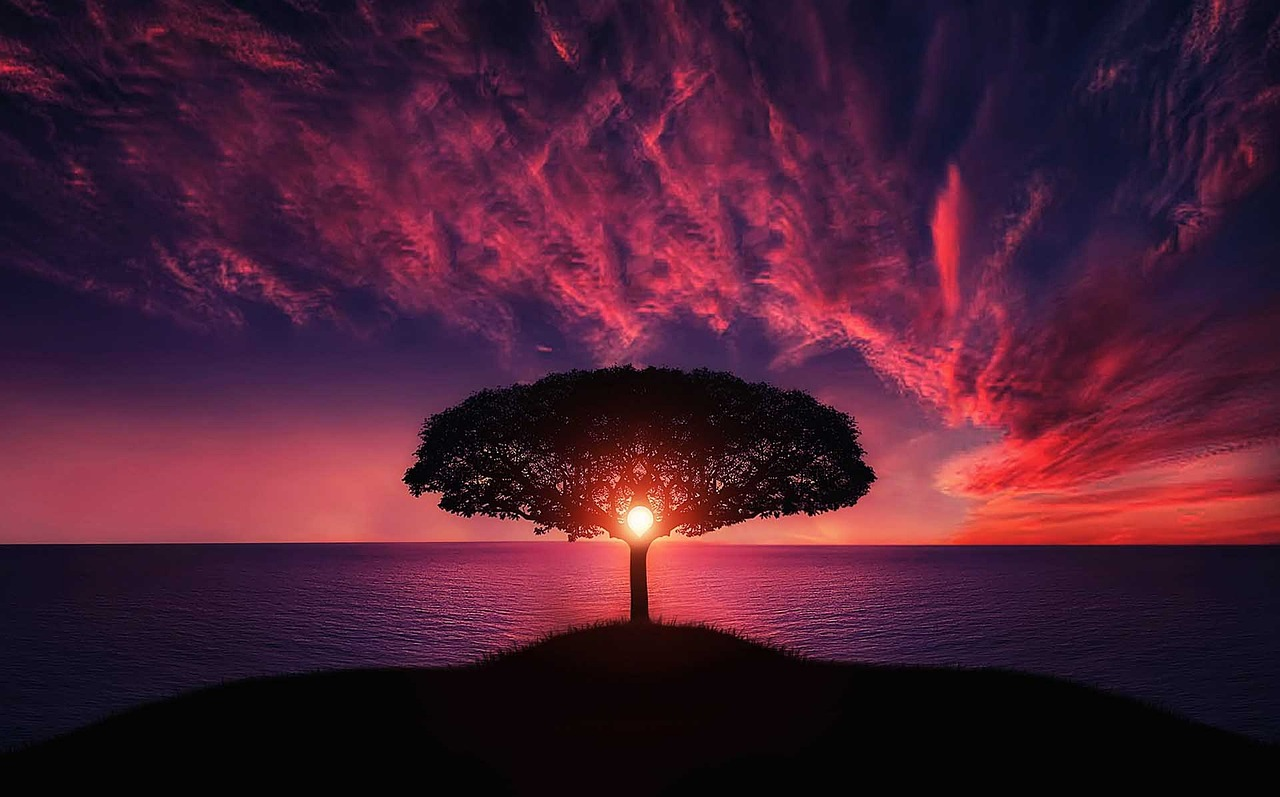